## Board Representation

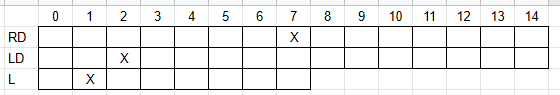

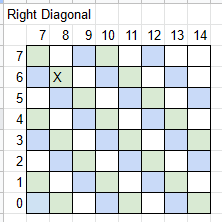

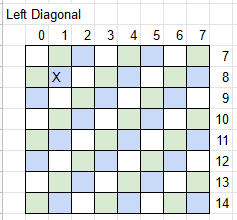

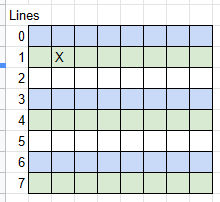

## Algorithm

In [2]:
def printBoard(board):
    for l in range(8):
        for c in range(8):
            print(f"{board[l][c]:2}", end=" ")
        print('')

In [3]:
with open('1.in', 'r') as file:
    content = file.readlines()
    #print(content)

n_test_cases = int(content[0])

boards = []
for n in range(0, n_test_cases):
    board = []
    for l in range(1,9):
        line = [int(c) for c in content[n*8+l].replace('\n', '').split()]
        board.append(line)
        
    boards.append(board)

In [17]:
def zeroes(l):
    return [False for _ in range(l)]

def condition(lin, col, params):
    if (
        not params['lines'][lin]
        and not params['right_diagonal'][lin - col + 7] 
        and not params['left_diagonal'][lin + col]
    ):
        return True
    return False
        
def set_control(lin, col, params, boolean):
    params['lines'][lin] = boolean
    params['right_diagonal'][lin - col + 7] = boolean
    params['left_diagonal'][lin + col ] = boolean
    
def backtracking(col, summ, params, max_scores):
    if col == 8:
        max_scores.append(summ)
        return True

    for lin in range(8):
        if condition(lin, col, params):
            set_control(lin, col, params, True)

            backtracking(col + 1, summ + params['board'][lin][col], params, max_scores)

            set_control(lin, col, params, False)
            
    return False

In [18]:
def solveQueens(board):
    max_scores = []
    
    # Control lists, marks if a queen blocks certain line or diagonal
    params = {
        'lines': zeroes(8), # lines
        'right_diagonal': zeroes(15),# diagonals left-up to right-down
        'left_diagonal': zeroes(15),# diagonals right-up to left-down
        'board': board,
#         'board': [[False for _ in range(8)] for _ in range(8)],
    }
    
    backtracking(0, 0, params, max_scores)

    print(max(max_scores))

In [26]:
printBoard(boards[4])

56 45 53 62 12 65 75 78 
61 37 70 11 26  9 43 29 
83 75 30 78 61 24 39 42 
 1 81 32 59 87 98 97 89 
 3 70 44 67 54 59 40 83 
65 10 81 74 81 19 94 53 
55 60 13 37 84  9 90 24 
71 98 90 96 43  9 53 60 


In [24]:
solveQueens(boards[4])

666
